# TUGAS ALJABAR LINEAR

- Nama : Daffa Maulana Danendra
- NIM : 23/523251/TK/57848
- Kelas : A

### KODE SETUP

**Library import**

In [1319]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

**Function setup**

In [1320]:
center2 = (0, 0)
center3 = (0, 0, 0)
unitCircle = np.eye(2)
θ = np.linspace(0, 2 * np.pi, 500)

def plotMatrices(matrices, names, labels, legend=True, lim=10):

    num_plots = len(matrices)
    fig = plt.figure(figsize=(5 * num_plots, 5))
    axs = []

    for i in range(num_plots):
        if len(matrices[i]) == 3:
            ax = fig.add_subplot(1, num_plots, i+1, projection='3d')
        else:
            ax = fig.add_subplot(1, num_plots, i+1)
        axs.append(ax)

    for i in range(num_plots):
        A = matrices[i]
        nama = names[i]
        label = labels[i]

        v1 = A[:, 0]
        v2 = A[:, 1]

        majorAxis = np.linalg.norm(v1)
        minorAxis = np.linalg.norm(v2)

        ellipsePoints = np.array([majorAxis * np.cos(t) * v1 / np.linalg.norm(v1) + minorAxis * np.sin(t) * v2 / np.linalg.norm(v2) for t in θ])

        if len(A) == 2:
            axs[i].set_title(nama)
            axs[i].plot(ellipsePoints[:, 0], ellipsePoints[:, 1], 'k', label=label)
            axs[i].quiver(*center2, *v1, angles='xy', scale_units='xy', scale=1, color='r', label=f'v1 ({round(v1[0], 3)}, {round(v1[1], 3)})')
            axs[i].quiver(*center2, *v2, angles='xy', scale_units='xy', scale=1, color='b', label=f'v2 ({round(v2[0], 3)}, {round(v2[1], 3)})')
            axs[i].set_xlim([-lim, lim])
            axs[i].set_ylim([-lim, lim])
            axs[i].set_aspect('equal', adjustable='box')
            if legend:
                axs[i].legend()
            axs[i].grid()

        elif len(A) == 3:
            axs[i].set_title(nama)
            axs[i].plot(ellipsePoints[:, 0], ellipsePoints[:, 1], ellipsePoints[:, 2], 'k', label=label)
            axs[i].quiver(*center3, *v1, color='r', label=f'v1 ({round(v1[0], 3)}, {round(v1[1], 3)}, {round(v1[2], 3)})')
            axs[i].quiver(*center3, *v2, color='b', label=f'v2 ({round(v2[0], 3)}, {round(v2[1], 3)}, {round(v2[2], 3)})')
            axs[i].set_xlim([-lim, lim])
            axs[i].set_ylim([-lim, lim])
            axs[i].set_zlim([-lim, lim])
            if legend:
                axs[i].legend()
            axs[i].grid()

    fig.tight_layout()
    plt.show()

# 1️⃣ EIGENVALUE DECOMPOSITION (ED)

**Eigenvalue Decomposition** adalah salah satu metode untuk memecah matriks. Tujuannya adalah menemukan matriks-matriks yang hasil kalinya akan kembali menghasilkan matriks asli. Dalam kasus Eigenvalue Decomposition, matriks akan diuraikan menjadi Matriks Eigenvektor dan Eigenvaluenya. Namun, kelemahan dari Eigenvalue Decomposition adalah tidak bisa digunakan pada matrix yang tidak square $ m \times n $ sehingga hanya dapat digunakan untuk mendekomposisi matrix square $n \times n$.


Dekomposisi pada matrix non-symetic adalah $A = X $ $\Lambda$ $X^{-1}$, sedangkan pada matrix symetric $A = Q $ $\Lambda$ $Q^{T}$. Dimana $X$ atau $Q$ merupakan Eigenvector, $\Lambda$ merupakan Eigenvalue, dan $X^{-1}$ atau $Q^{T}$ merupakan inverse dari Eigenvector. Pada kasus symetric matrix Eigenvectornya merupakan matrix orthonormal yang mana tiap kolomnya saling tegak lurus dan memiliki panjang satu. Oleh karena itu, Eigenvector pada matrix symetric dapat dikatakan memiliki basis yang bagus.

## 🟠 MATRIX $A$ : Non-Symetric 2x2

$$ A = \begin{bmatrix} 3 & 2 \\ 1 & 2 \end{bmatrix} $$

In [1321]:
A = np.array([[3,2],[1,2]])

### **Dekomposisi Matrix $A$**

Kita akan melakukan dekomposisi pada Matrix $A$ yang tidak simetris sehingga dekomposisinya akan menjadi

$A = X $ $\Lambda$ $X^{-1}$

Dimana :
* $X$ adalah matrix yang setiap kolomnya berisi eigenvector
* $\Lambda$ adalah matrix diagonal yang berisi eigenvalue
* $X^{-1}$ adalah invers dari $X$

In [1322]:
eigvalA,eigvecA=eig(A)

eigvalA = np.diag(eigvalA)
eigvecAinv = np.linalg.inv(eigvecA)

jadi, Matrix A memiliki dekomposisi

$$
A
\text{ }
=
\text{ }
\underbrace{
  \begin{bmatrix}
    0.894 & -0.707 \\
    0.447 & 0.707
  \end{bmatrix}
}_{X (2 \times 2)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    4 & 0 \\
    0 & 1
  \end{bmatrix}
}_{\Lambda (2 \times 2)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    0.745 & 0.745 \\
    -0.471 & 0.943
  \end{bmatrix}
}_{ X^{-1} (2 \times 2)}
$$


Selanjutnya, kita akan melakukan plot pada dekomposisi Matrix $A$

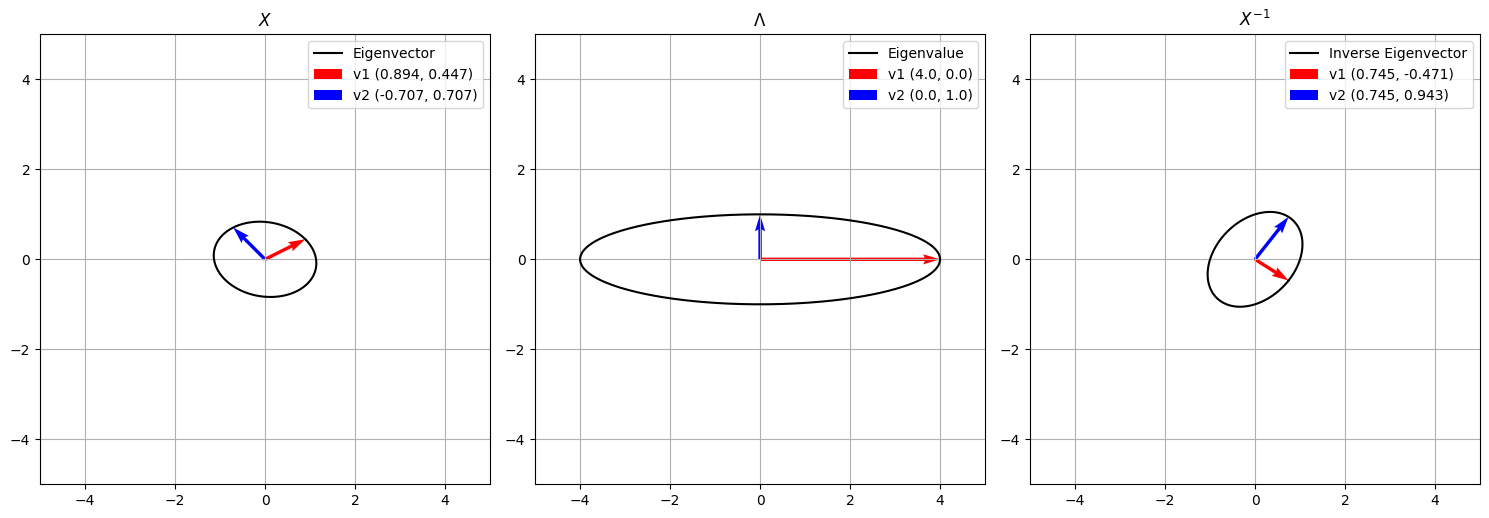

In [1323]:
matrices = [eigvecA,eigvalA,eigvecAinv]
name = ['$X$', '$\Lambda$', '$X^{-1}$']
labels = ['Eigenvector', 'Eigenvalue', 'Inverse Eigenvector']

plotMatrices(matrices,name,labels,True,5)

Jika matriks $A$ dipandang sebagai matriks transformasi, maka dekomposisi matriks $A$ ini juga bisa dipandang sebagai submatriks yang juga melakukan subtransformasi : 1. Rotasi, 2. Scaling, 3. Rotasi. Setelah ini saya akan memperlihatkan bagaimana submatriks tersebut mentransformasi.

### **Geometric Perspective**

Pada bagian ini, saya akan memperlihatkan bagaimana dekomposisi matriks melakukan rotasi dan scaling terhadap unit circle $\vec{x}$. Unit circle tersebut akan ditransformasi oleh dekomposisi matrix $A$

$ A \vec{x} = X \Lambda X^{-1} \vec{x} $

Kita akan melihat plot perkalian matrix unit circle $\vec{x}$ dengan dekomposisi matriks A ($X Λ X^{-1}$)

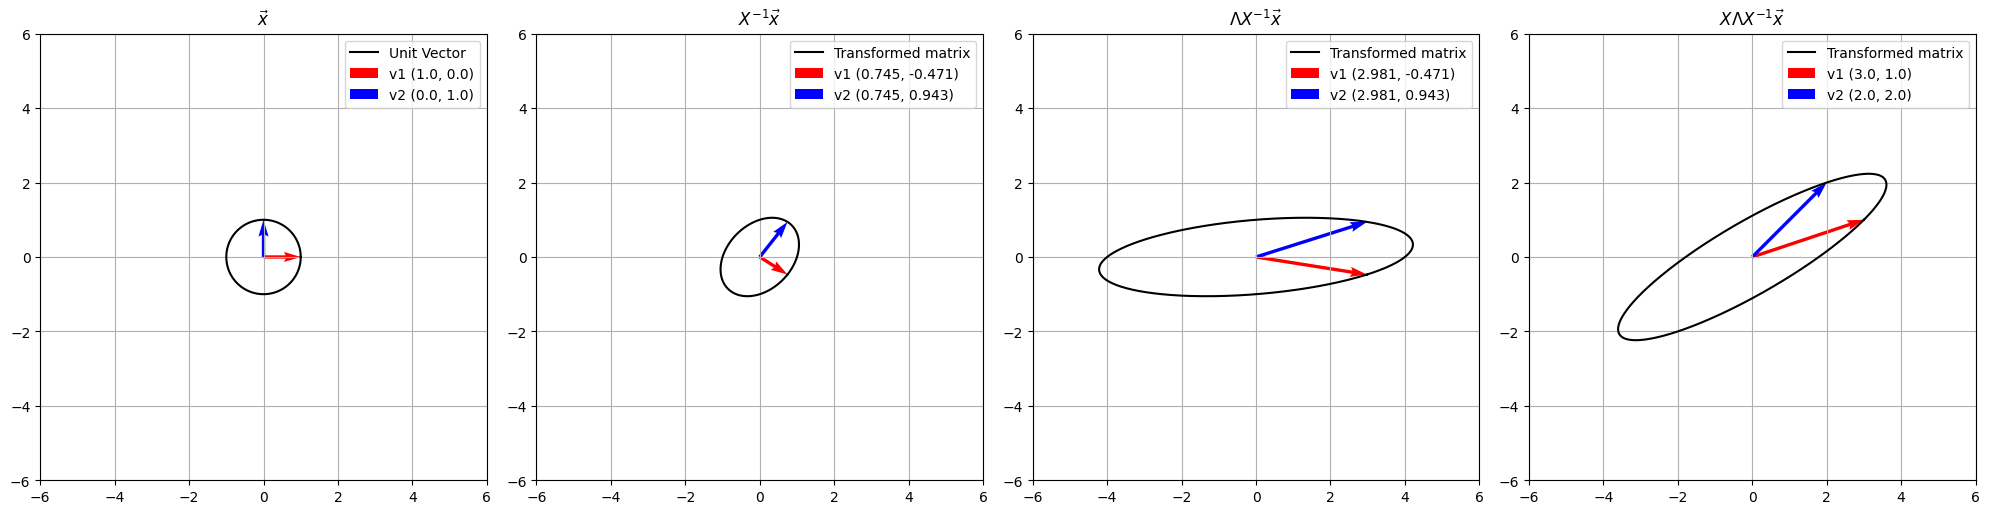

In [1324]:
matrices = [
    unitCircle,
    np.matmul(eigvecAinv, unitCircle),
    np.matmul(eigvalA, np.matmul(eigvecAinv, unitCircle)),
    np.matmul(eigvecA, np.matmul(eigvalA, np.matmul(eigvecAinv, unitCircle)))
    ]
name = [r'$ \vec{x} $', r'$ X^{-1} \vec{x} $', r'$ \Lambda X^{-1} \vec{x} $', r'$ X \Lambda X^{-1} \vec{x} $']
labels = ['Unit Vector','Transformed matrix','Transformed matrix','Transformed matrix']

plotMatrices(matrices,name,labels,True,6)

Dari hasil plot tersebut, dapat dilihat bahwa ruang matrix $\vec{x}$ dilakukan rotasi oleh $X^{-1}$ dengan mengubah koordinat data ruang asal ke dalam ruang eigen. Lalu dilakukan penskalaan oleh $\Lambda$ dengan panjang vektor dengan memperbesar atau memperkecil sesuai dengan eigenvalue. Terakhir, dilakukan Rotasi oleh $X$ dengan tujuan mengembalikan data ke ruang asal.

## 🟠 MATRIX $B$ : Symetric 2x2

$$ B = \begin{bmatrix} 1 & 3 \\ 3 & 1 \end{bmatrix} $$

In [1325]:
B = np.array([[1,3],[3,1]])

### **Dekomposisi Matrix B**

Kita akan melakukan dekomposisi pada Matrix $B$ yang simetris sehingga dekomposisinya akan menjadi

$B = Q $ $\Lambda$ $Q^{T}$

Dimana :
* $Q$ adalah matrix eigenvector yang tiap kolomnya orthonormal
* $\Lambda$ adalah matrix diagonal yang berisi eigenvalue real
* $Q^T$ adalah transpose dari $Q$  

In [1326]:
eigvalB,eigvecB=eig(B)

eigvalB = np.diag(eigvalB)
eigvecBinv = np.linalg.inv(eigvecB)

jadi, Matrix $B$ memiliki dekomposisi

$$
B
\text{ }
=
\text{ }
\underbrace{
  \begin{bmatrix}
    0.707 & -0.707 \\
    0.707 & 0.707
  \end{bmatrix}
}_{X (2 \times 2)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    4 & 0 \\
    0 & -2
  \end{bmatrix}
}_{\Lambda (2 \times 2)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    0.707 & 0.707 \\
    -0.707 & 0.707
  \end{bmatrix}
}_{ X^{-1} (2 \times 2)}
$$


Selanjutnya, kita akan melakukan plot pada dekomposisi Matrix $B$

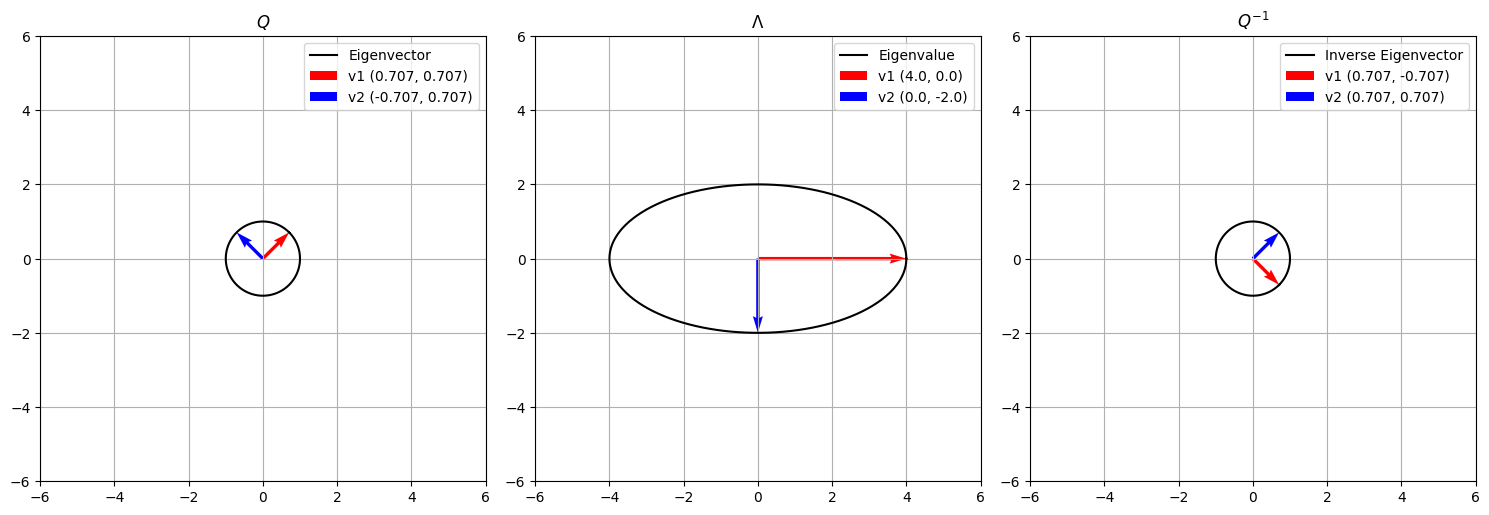

In [1327]:
matrices = [eigvecB,eigvalB,eigvecBinv]
name = ['$Q$', '$\Lambda$', '$Q^{-1}$']
labels = ['Eigenvector', 'Eigenvalue', 'Inverse Eigenvector']

plotMatrices(matrices,name,labels,True,6)

Jika matriks $B$ dipandang sebagai matriks transformasi, maka dekomposisi matriks $B$ ini juga bisa dipandang sebagai submatriks yang juga melakukan subtransformasi : 1. Rotasi, 2. Scaling, 3. Rotasi. Terlebih lagi matriks $B$ adalah matriks symetric yang mana memiliki basis yang bagus. Setelah ini saya akan memperlihatkan bagaimana submatriks tersebut mentransformasi.

### **Geometric Perspective**

Pada bagian ini, saya akan mengalikan matrix $B$ dengan $\vec{x}$. Dengan demikian, dekomposisi matrix $B$ akan dikalikan dengan $\vec{x}$ dan akan terlihat perubahan secara geometrisnya

$ B \vec{x} = Q \Lambda Q^{T} \vec{x} $



Kita akan melihat plot perkalian matrix unit circle $\vec{x}$ dengan dekomposisi matriks B ($Q Λ Q^{T}$)

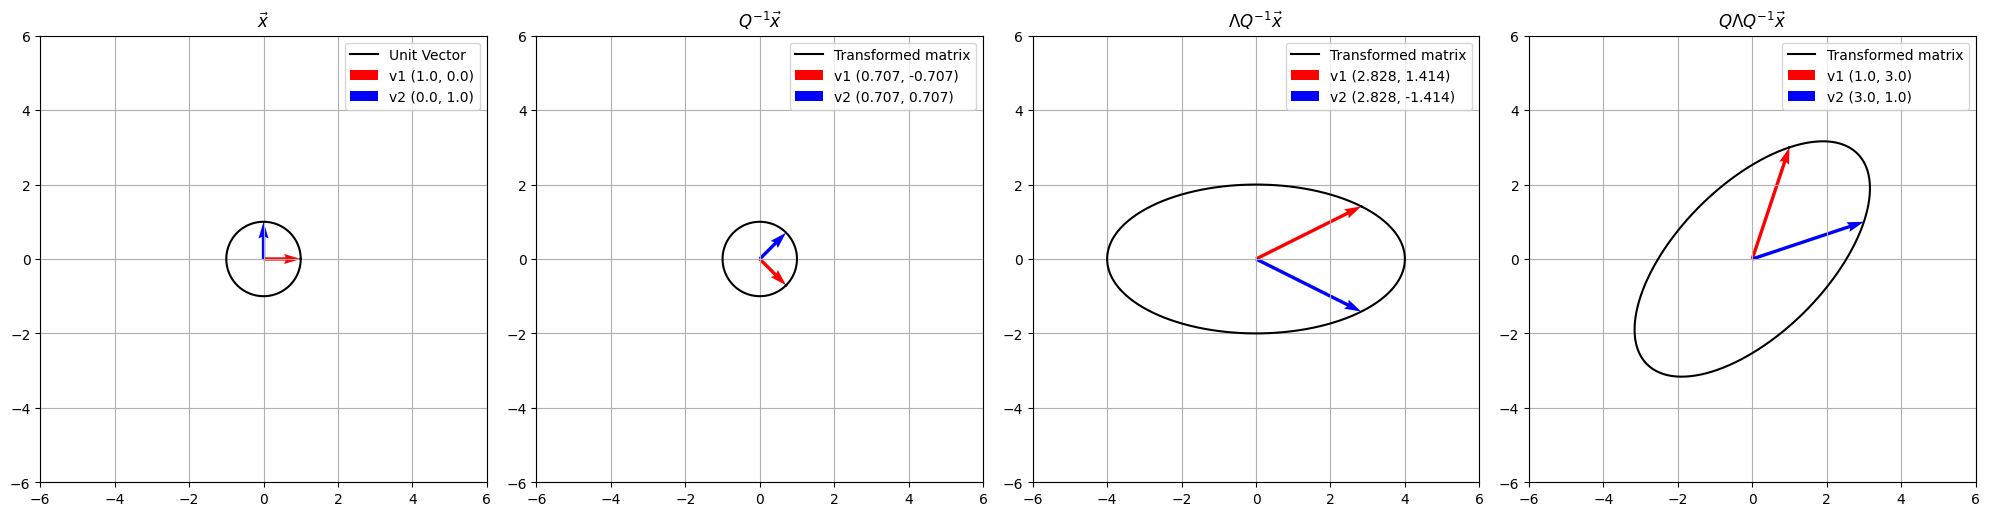

In [1328]:
matrices = [
    unitCircle,
    np.matmul(eigvecBinv, unitCircle),
    np.matmul(eigvalB, np.matmul(eigvecBinv, unitCircle)),
    np.matmul(eigvecB, np.matmul(eigvalB, np.matmul(eigvecBinv, unitCircle)))
    ]
name = [r'$ \vec{x} $', r'$ Q^{-1} \vec{x} $', r'$ \Lambda Q^{-1} \vec{x} $', r'$ Q \Lambda Q^{-1} \vec{x} $']
labels = ['Unit Vector','Transformed matrix','Transformed matrix','Transformed matrix']

plotMatrices(matrices,name,labels,True,6)

Dari hasil plot tersebut, dapat dilihat bahwa ruang matrix $\vec{x}$ dilakukan rotasi oleh $Q^{T}$ dengan mengubah koordinat data ruang asal ke dalam ruang eigen. Lalu dilakukan penskalaan oleh $\Lambda$ dengan panjang vektor dengan memperbesar atau memperkecil sesuai dengan eigenvalue. Terakhir, dilakukan Rotasi oleh $Q$ dengan tujuan mengembalikan data ke ruang asal.

# 2️⃣ SINGULAR VALUE DECOMPOSITION (SVD)

**Singular Value Decomposition** idenya mirip dengan Eigenvalue Decomposition yaitu memecah matriks menjadi beberapa matriks yang hasil kalinya akan kembali menghasilkan matriks asli. Pada kasus Singular Value Decomposition, suatu matriks dapat dipecah menjadi Eigenvector dan Singular Value tanpa melihat matriks itu square atau non-square.

Misal kita memiliki matriks C yang akan kita dekomposisi dengan metode Singular Value Decomposition, maka matrix C akan memiliki dekomposisi $U \Sigma V^{T}$. $U$ merupakan Left Singular Matrix yang didapat dari $A A^{T}$, sedangkan V didapatkan dari $A^{T} A$. Kedua matrix $U$ dan $V$ merupakan matriks square namun dengan dimensi yang berbeda.

Matriks Singular Value merupakan diagonal matriks, yang mana diagonalnya merupakan akar dari eigenvalue $U$ dan $V$. Uniknya eigenvalue $U$ dan $V$ sama, jika matriks $U$ memiliki dimensi yang lebih besar dari $V$ maka eigenvalue dari $U$ adalah semua eigenvalue dari $V$ sisanya bernilai nol.

## 🟠 MATRIX $C$ : 3x2

$$ C = \begin{bmatrix} 4 & 1 \\ 3 & 2 \\ 1 & 3 \end{bmatrix} $$

In [1329]:
C = np.array([[4, 1], [2, 3], [1, 5]])

### **Dekomposisi Matrix C**

Pada kasus matrix symetric memiliki dekomposisi yang sedikit berbeda dengan matrix non-symetric, karena eigenvector dari matrix symetric merupakan orthogonal matrix dimana panjang tiap vektor penyususnnya tegak lurus dan panjangnya satu. Selain itu, eigenvaluenya juga selalu positif.

Kita akan melakukan dekomposisi pada Matrix $C$ yang tidak square sehingga dekomposisinya akan menjadi

$C = U $ $\Sigma$ $V^{T}$

Dimana :
* $U$ adalah matriks ortogonal yang berisi vektor-vektor left singular  
* $\Sigma$ adalah matriks diagonal yang berisi nilai-nilai singular  
* $V^T$ adalah matriks ortogonal yang berisi vektor-vektor right singular

In [1330]:
U,S,V = svd(C)

S = np.vstack([np.diag(S),[0,0]])
Vt = V.T

jadi, Matrix $C$ memiliki dekomposisi

$$
C
\text{ }
=
\text{ }
\underbrace{
  \begin{bmatrix}
    -0.448 & 0.838 & 0.310 \\
    -0.540 & 0.022 & -0.841 \\
    -0.712 & -0.545 & 0.443
  \end{bmatrix}
}_{U (3 \times 3)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    6.675 & 0 \\
    0 & 3.383 \\
    0 & 0
  \end{bmatrix}
}_{\Sigma (3 \times 2)}
\text{ } . \text{ }
\underbrace{
  \begin{bmatrix}
    -0.537 & 0.843 \\
    -0.843 & -0.537
  \end{bmatrix}
}_{V (2 \times 2)}
$$  

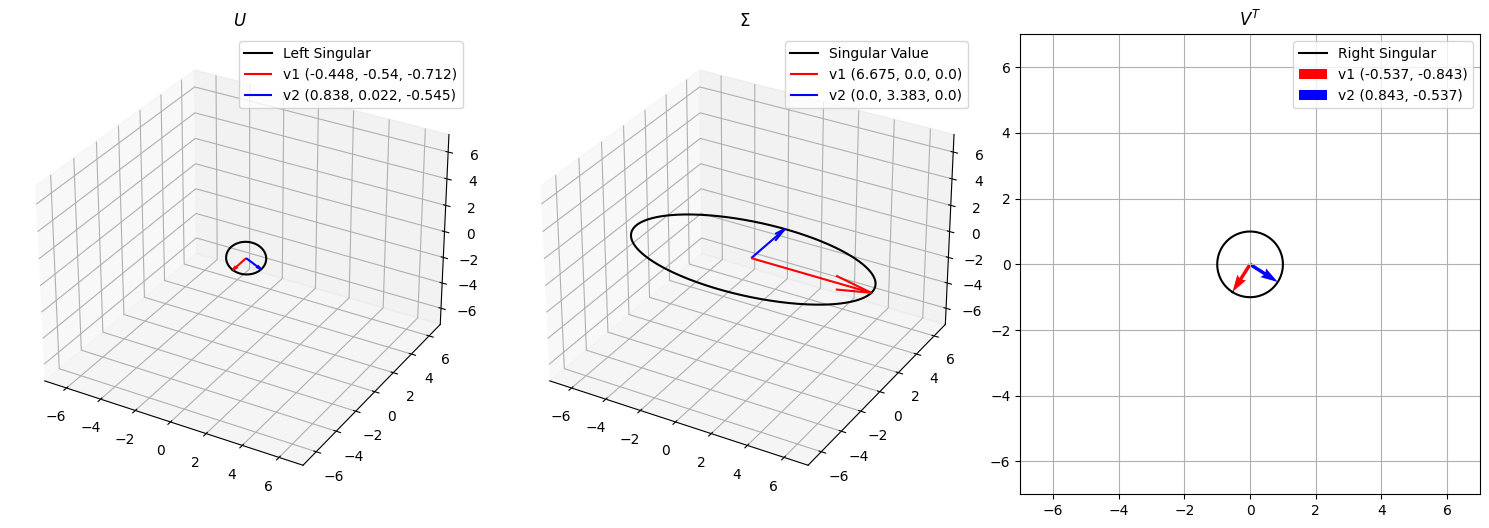

In [1331]:
matrices = [U,S,Vt]
name = ['$U$', '$\Sigma$', '$V^{T}$']
labels = ['Left Singular', 'Singular Value', 'Right Singular']

plotMatrices(matrices,name,labels,True,7)

### **Geometric Perspective**

Pada bagian ini, saya akan mengalikan matrix $C$ dengan $\vec{x}$. Dengan demikian, dekomposisi matrix $C$ akan dikalikan dengan $\vec{x}$ dan akan terlihat perubahan secara geometrisnya

$ C \vec{x} = U \Sigma V^{T} \vec{x} $



Kita akan melihat plot perkalian matrix unit circle $\vec{x}$ dengan dekomposisi matriks C ($U \Sigma V^{T}$)

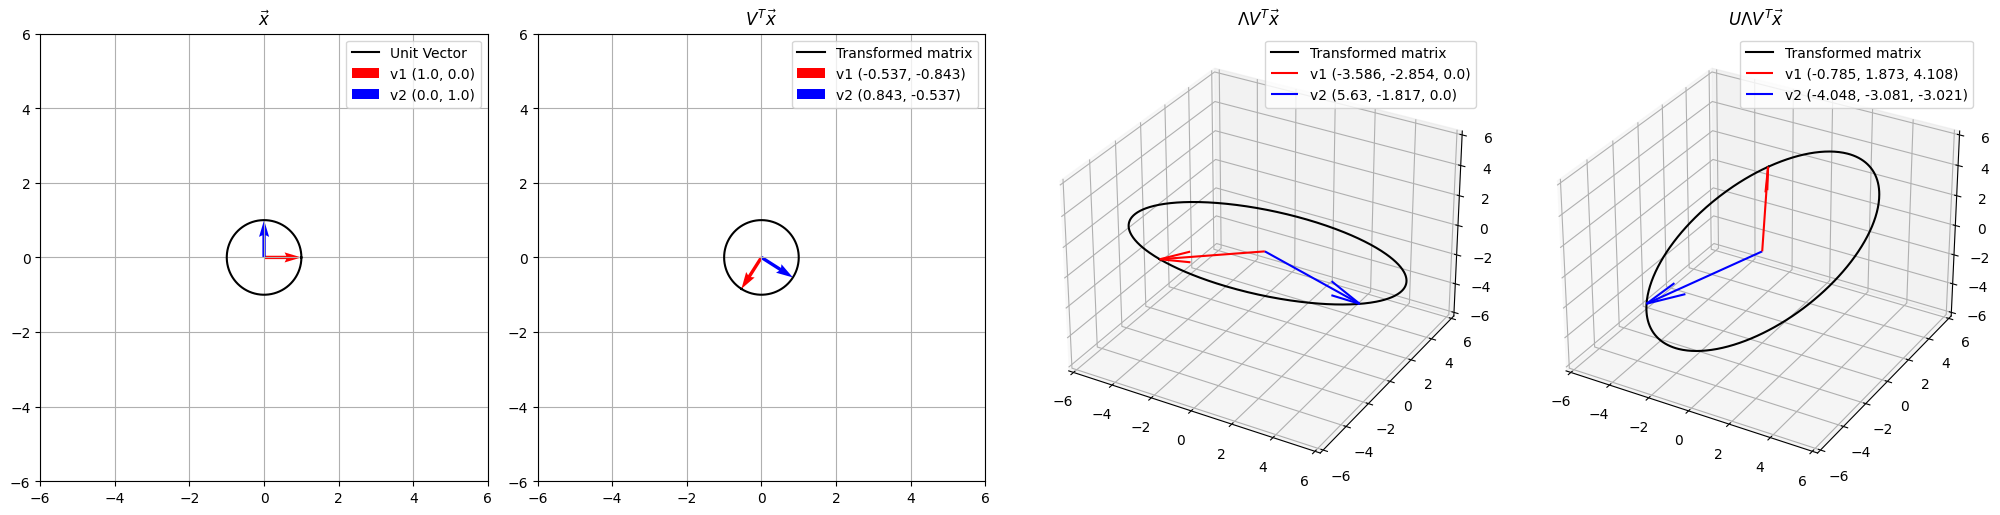

In [1332]:
matrices = [
    unitCircle,
    np.matmul(Vt, unitCircle),
    np.matmul(S, np.matmul(Vt, unitCircle)),
    np.matmul(U, np.matmul(S, np.matmul(Vt, unitCircle)))
]
name = [r'$ \vec{x} $', r'$ V^{T} \vec{x} $', r'$ \Lambda V^{T} \vec{x} $', r'$ U \Lambda V^{T} \vec{x} $']
labels = ['Unit Vector','Transformed matrix','Transformed matrix','Transformed matrix']

plotMatrices(matrices,name,labels,True,6)

Dari hasil plot tersebut, dapat dilihat bahwa ruang matrix $\vec{x}$ dilakukan rotasi oleh $V^{T}$ dengan mengubah koordinat data ruang asal ke dalam ruang singular. Lalu dilakukan penskalaan oleh $\Sigma$ dengan panjang vektor dengan memperbesar atau memperkecil sesuai dengan singular. Terakhir, dilakukan Rotasi oleh $U$ dengan tujuan mengembalikan data ke ruang asal.

# 📌 REFERENCES

- [Gilber Strang's Book "Linear algebra and its applications"](https://math.mit.edu/~gs/linearalgebra/)
- ["SVD Visualized, Singular Value Decomposition explained" by Visual Kernal](https://www.youtube.com/watch?si=7aaxFTeLYcKl_sLF&v=vSczTbgc8Rc&feature=youtu.be)
- ["Visualize of Spectral Decomposition" by Visual Kernel](https://youtu.be/mhy-ZKSARxI?si=ybzSmgwiZ533YH56)
- ["2.7 Eigenvalue Decomposition" by akhilvasvani](https://github.com/akhilvasvani/Linear-Algebra-Basics/blob/master/Chapters/2.07%20Eigendecomposition/2.7%20Eigendecomposition.ipynb)
- ["2.8 Singular Value Decomposition" by akhilvasvani](https://github.com/akhilvasvani/Linear-Algebra-Basics/blob/master/Chapters/2.08%20Singular%20Value%20Decomposition/2.8%20Singular%20Value%20Decomposition.ipynb)
- ["Geometric viewpoint of SVD" by Artificially Intelligence](https://towardsdatascience.com/svd-a-geometric-view-point-cfc0c689bdc0)
- ["Geometrical Interpretation of Singular Value
Decomposition(Svd) & Applications of SVD"](https://www.arcjournals.org/pdfs/ijsimr/v5-i4/4.pdf)

- ["Geometric of Eigenvalue Decomposition" by Guzinta Math](https://guzintamath.com/textsavvy/2019/02/02/eigenvalue-decomposition/)
- ["Singular Value Decomposition" by Andrew Lounsbury](https://www.tntech.edu/cas/pdf/math/techreports/TR-2018-2.pdf)
- ["Linear Algebra" by 3 Blue 1 Brown](https://www.3blue1brown.com/topics/linear-algebra)